<a href="https://colab.research.google.com/github/divgupt12/Loan-Default/blob/main/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Loan Default 2.csv")

In [ ]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [ ]:
df.isnull().any()

Index            False
Employed         False
Bank Balance     False
Annual Salary    False
Defaulted?       False
dtype: bool

In [ ]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [ ]:
df = df.loc[:, ["Employed", "Bank Balance", "Annual Salary", "Defaulted?"]]

In [ ]:
df

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [ ]:
import seaborn as sns

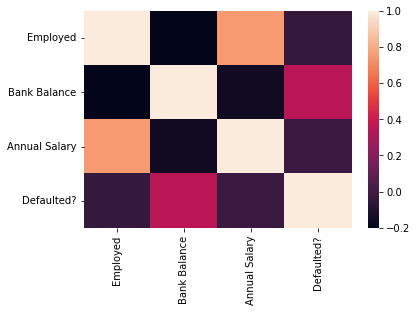

In [ ]:
sns.heatmap(df.corr())

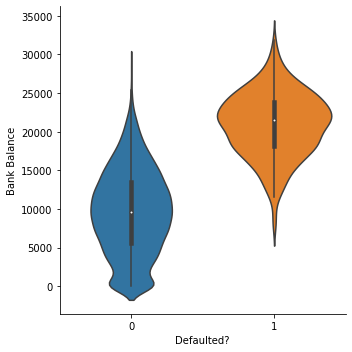

In [ ]:
sns.catplot(data=df,x="Defaulted?",y="Bank Balance", kind="violin")

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Bank Balance')

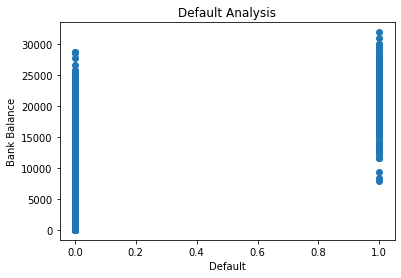

In [ ]:
plt.scatter(df["Defaulted?"], df["Bank Balance"])
plt.title("Default Analysis")
plt.xlabel("Default")
plt.ylabel("Bank Balance")

In [ ]:
dummy = pd.get_dummies(df["Employed"])

In [ ]:
df = df.merge(dummy,left_index=True,right_index=True)

In [ ]:
df

,Employed,Bank Balance,Annual Salary,Defaulted?,0,1
0,1,8754.36,532339.56,0,0,1
1,0,9806.16,145273.56,0,1,0
2,1,12882.60,381205.68,0,0,1
3,1,6351.00,428453.88,0,0,1
4,1,9427.92,461562.00,0,0,1
...,...,...,...,...,...,...
9995,1,8538.72,635908.56,0,0,1
9996,1,9095.52,235928.64,0,0,1
9997,1,10144.92,703633.92,0,0,1
9998,1,18828.12,440029.32,0,0,1


In [ ]:
df = df.drop(columns="Employed")

In [ ]:
df

,Bank Balance,Annual Salary,Defaulted?,0,1
0,8754.36,532339.56,0,0,1
1,9806.16,145273.56,0,1,0
2,12882.60,381205.68,0,0,1
3,6351.00,428453.88,0,0,1
4,9427.92,461562.00,0,0,1
...,...,...,...,...,...
9995,8538.72,635908.56,0,0,1
9996,9095.52,235928.64,0,0,1
9997,10144.92,703633.92,0,0,1
9998,18828.12,440029.32,0,0,1


In [ ]:
X = df.drop(columns="Defaulted?")
Y = df["Defaulted?"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [ ]:
Y_train.value_counts()

0    7246
1     254
Name: Defaulted?, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
Y_train.value_counts()

1    7246
0    7246
Name: Defaulted?, dtype: int64

In [ ]:
from scipy import stats

In [ ]:
X_test["Annual Salary"]= stats.zscore(X_test["Annual Salary"])

In [ ]:
X_train["Annual Salary"]= stats.zscore(X_train["Annual Salary"])

In [ ]:
X_train["Bank Balance"]= stats.zscore(X_train["Bank Balance"])

In [ ]:
X_test["Bank Balance"]= stats.zscore(X_test["Bank Balance"])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LogisticRegression(random_state=1)

In [ ]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.6024


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


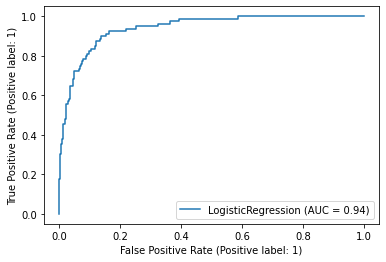

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


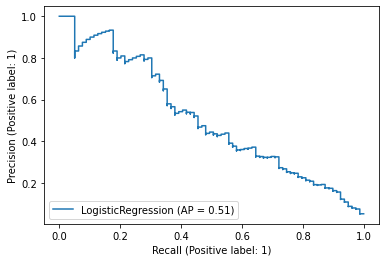

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,Y_test)

In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.7148


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


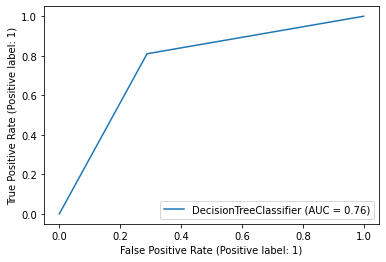

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


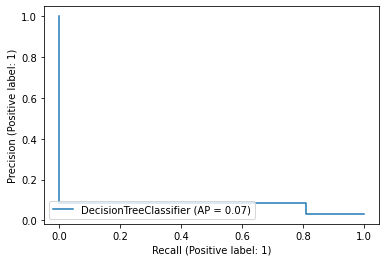

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,Y_test)

In [ ]:
from sklearn import ensemble

In [ ]:
model = ensemble.RandomForestClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


accuracy is  0.6692


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


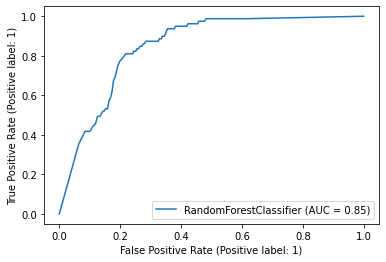

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


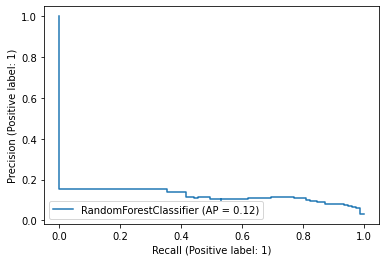

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,Y_test)

In [ ]:
model = ensemble.GradientBoostingClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


accuracy is  0.606


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


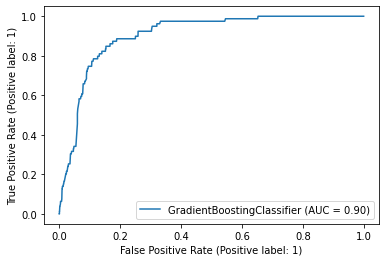

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


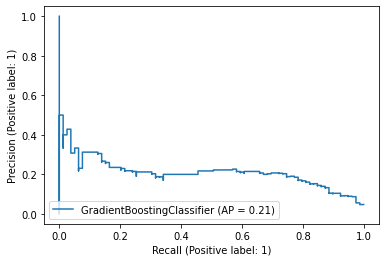

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,Y_test)

In [ ]:
from sklearn import neural_network

In [ ]:
model = neural_network.MLPClassifier(random_state=1)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


accuracy is  0.5992


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


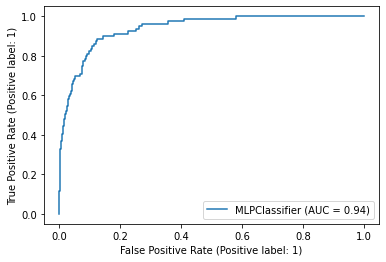

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


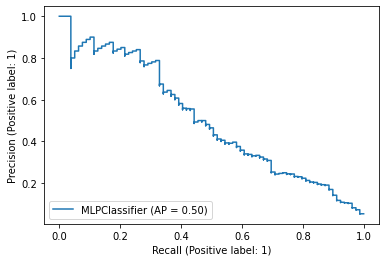

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model,X_test,Y_test)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(4,input_dim=4,activation="relu"))

In [ ]:
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(4,activation="relu"))

In [ ]:
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.add(Dropout(0.1))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train,batch_size=2,epochs=30)

Epoch 1/30
7246/7246 [==============================] - 14s 2ms/step - loss: 1.0636 - accuracy: 0.8564
Epoch 2/30
7246/7246 [==============================] - 7s 1ms/step - loss: 1.0280 - accuracy: 0.8530
Epoch 3/30
7246/7246 [==============================] - 7s 1ms/step - loss: 1.0486 - accuracy: 0.8521
Epoch 4/30
7246/7246 [==============================] - 7s 1ms/step - loss: 1.0554 - accuracy: 0.8534
Epoch 5/30
7246/7246 [==============================] - 7s 995us/step - loss: 1.0363 - accuracy: 0.8536
Epoch 6/30
7246/7246 [==============================] - 7s 1ms/step - loss: 1.0135 - accuracy: 0.8563
Epoch 7/30
7246/7246 [==============================] - 7s 1ms/step - loss: 1.0770 - accuracy: 0.8492
Epoch 8/30
7246/7246 [==============================] - 7s 1ms/step - loss: 1.0542 - accuracy: 0.8533
Epoch 9/30
7246/7246 [==============================] - 8s 1ms/step - loss: 1.0505 - accuracy: 0.8536
Epoch 10/30
7246/7246 [==============================] - 8s 1ms/step - loss: 1.

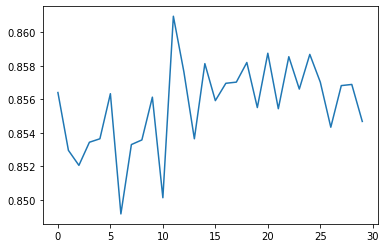

In [ ]:
plt.plot(history.history["accuracy"])

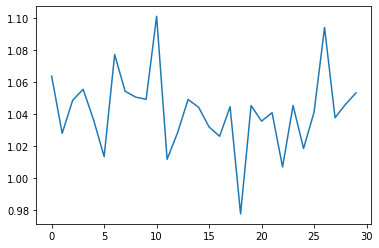

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
model.evaluate(X_test,Y_test)

79/79 [==============================] - 0s 855us/step - loss: 0.6331 - accuracy: 0.6256


[0.6331102252006531, 0.6255999803543091]

In [ ]:
df.to_csv("Loan_Default.csv")

In [ ]:
#how to improve the results by change the features selected, data wrangling or parameter setting, ncluding using keras and tensorflow?
#Ans. The results were improved by changing the dropout rate to 0.1, as the learning rate for the neural network model is slow. So, the dropouts
#are made less infrequent to avoid the issue of underfitting and reducing the huge variability in the model. Also, since there are two variables
#binary crossentropy is used to predict the model loss, so as to calculate the value of error from both sides. Furthermore increasing the batch size
#by 2 has helped to reduce the change of weight too frequently and has again helped to reduce the variability of this model, thus increasing the accuracy.


In [ ]:
#Qualitatively, explain the pros and cons about your model

#Logistics Regression - One of the advantages of Logistics regression is that is the eaiest model to implement, and always a great a ccuracy for the
#simple data sets. However, Logistics Regression considers a linear relation between the independent and dependent variable and cannot thus measure any
#non linear data. It is thus too simplied for complex data such as this, when it becomes tough to trace relationship between the variables under this
#model.

#Decision Tree - One of the major advantage of a decision tree is that it dies not requires scaling or normalisation of data which is bringing the difference
#accuracy in the current dataset, while requiring less effort to pre-process the same data. However the analysis for the decision tree is based on just
#tree and it fails to build upon different angles of the model as it's imporved version Random forest or gradient boosting does. Also, changing a little
#value in the whole model can lead the decision tree model to collapse.

#Random Forest - Random forest is an improved version of the decision tree model and anaylses the data based on multiple trees, following an esemble model
#The multiplicity of trees avoids the issue of overfitting, reducing variance and increasing accuracy. Here as well no scaling is required, which can still
#lead to higher accuracy. A major drawback is complexity of the model, as it requires the construction and combining a lot of trees abd because of this
#random forest takes much more time to train the dataset than other models.

#Gradient Boosting - Gradient boosting generally train faster especially on large datasets. In this model, the missing values are handled proactively.
#However, this is generally considered the weak model, because the model is quite prone to overfitting and computational and time expensive.

#Neural Network - A neural network is designed to learn and improve its results continuously. Once the system is trained, it can produce output
#without the need for complete inputs, which makes it more user friendly. Neural network enables effective data retrieval as it it not dependent,
#and all the data is saved over the cloud. However, most neural networks are black-box systems generating results based on experience and
#not on specified programs, making it difficult for modifications.



In [ ]:
#How to overcome the weakness of your model (future study)
#Ans. When compared with orange, the accuracy and precision recall for all the models are quite high. This problem can somewhat be attributed to the
#issue of oversampling, wherein we are increasing the variables in Y which might not have any relevance or correlation to the X variables and hence is
#reducing the overall accuracy of the model. To avoid this we can normalise before oversampling or can undersample the Y variables by removing the values
#which would not have much impact on the overall model. The analysis can further be improved, if more data about other variables such as interest rates,
#repayement period, collateral, etc are analyzed, as these including others factors may contribute towards predicting the loan default situations.

In [ ]:
#the important of your model to the bank
#Ans. This model gives bank a decision rule to work on how different customers default on loan payment and what are the general factors impacting the same.
#With this model, if a bank knows that the higher income group people are the ones defaulting, they can charge a higher interest on those loans to
#compensate for the financial risk that the bank is bearing. Also, if the model suggests that age is the huge factor, they can revise their loan policy
#considering the economic condition and motive of the person for the loan at all ages. Furthermore, as the tests have been conducted with different models,
#the bank can reproduce the model with highest accuracy on another data set to check it's validity, then finally adopting the same in their BAU.